# Task 2 – Predict Future Stock Prices (Short-Term)

**Objective**  
Use historical stock data to predict the next day's closing price.

**Stock chosen**  
Apple (AAPL)

**What I will do**  
- Download real stock data using yfinance  
- Prepare features (Open, High, Low, Volume)  
- Train a simple model (Linear Regression)  
- Show real prices vs predicted prices in a plot

**Tools**  
- yfinance  
- pandas  
- scikit-learn  
- matplotlib

In [1]:
!pip install yfinance pandas scikit-learn matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

stock = yf.download('AAPL', start='2020-01-01', end='2025-12-31')

print("First 5 rows of data:")
print(stock.head())

print("\nData shape:", stock.shape)

[*********************100%***********************]  1 of 1 completed

First 5 rows of data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468285  72.528604  71.223282  71.476622  135480400
2020-01-03  71.763718  72.523746  71.539330  71.696160  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995354  72.600960  71.775789  72.345204  108872000
2020-01-08  73.153488  73.455087  71.698574  71.698574  132079200

Data shape: (1507, 5)


In [4]:
features = stock[['Open', 'High', 'Low', 'Volume']].copy()
target = stock['Close'].shift(-1) 

features = features[:-1]
target = target[:-1]

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (1506, 4)
Target shape: (1506, 1)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=False 
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


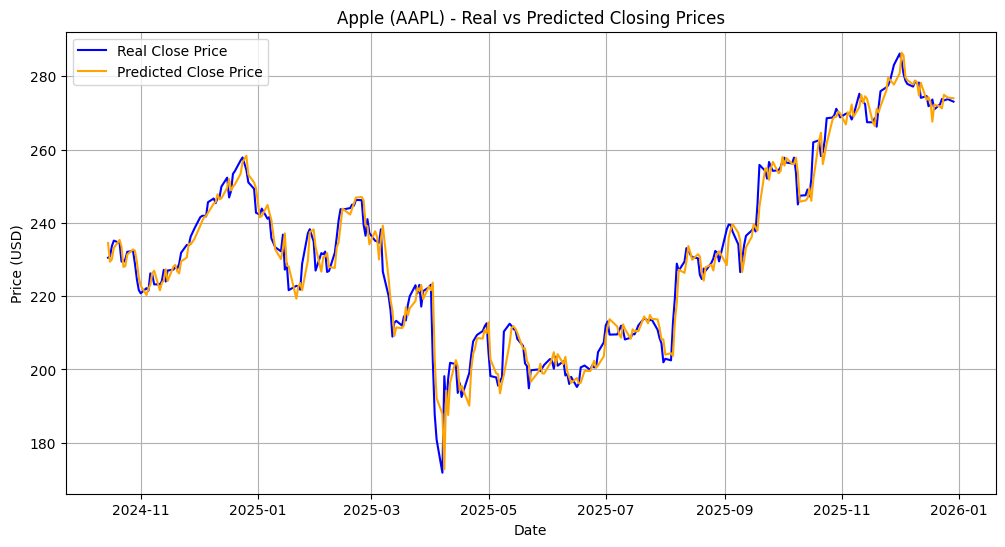

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Real Close Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Price', color='orange')
plt.title('Apple (AAPL) - Real vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:

error = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {error:.4f}")
print(f"Root Mean Squared Error: {error**0.5:.4f}")

Mean Squared Error: 18.2641
Root Mean Squared Error: 4.2737


## Results & Insights

- Used AAPL stock data from 2020 to recent date
- Features: Open, High, Low, Volume
- Model: Linear Regression
- Plot shows predicted prices follow the general trend but are not perfect (normal for stocks)
- MSE: [18.2641]

**What I learned**  
- How to download real stock data with yfinance  
- Basic time-series preparation (shift target)  
- Simple regression for prediction  
- Visualizing predictions vs reality
